In [65]:
import numpy as np
#from fancyimpute import simple_fill
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

"""
0. median imputation
1. normalise
# OUTLIER DETECTION?
2. feature selection using rfe to 250 ( -> IMPROVE!!!)
3. grad, knn regressors -> bagging -> average (1, 0.5)
4. => final prediction

"""

### 0. import -> impute
#X_in = np.genfromtxt ('X_train.csv', delimiter=",")[1:,1:]
X_in = np.genfromtxt ('Xtrain_clean.csv', delimiter=",")[1:,2:]
y_in = np.genfromtxt ('Xtrain_clean.csv', delimiter=",")[1:,1]
#X_in = np.delete(X_in,1,1)
#y_in = np.genfromtxt ('y_train.csv', delimiter=",")[1:,1:]
#X_out = np.genfromtxt ('X_test.csv', delimiter=",")[1:,1:] #also contains NAs
X_out = np.genfromtxt ('Xtest_clean.csv', delimiter=",")[1:,1:] #also contains NAs
print(X_in.shape)
print(X_out.shape)
labels_out = np.genfromtxt ('Xtest_clean.csv', delimiter=",")[1:,0]
print(X_tot.shape)



(1188, 832)
(776, 832)
(1964, 832)


In [44]:
X_tot = np.concatenate((X_in, X_out), axis=0)
#median_imputer = simple_fill.SimpleFill(fill_method="median")
X_medimp = median_imputer.fit_transform(X_tot)


In [67]:
import pandas as pd

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

N_SPLITS = 5

rng = np.random.RandomState(0)

X_full = np.concatenate((X_in, X_out), axis=0)
y_full = y_in
n_samples, n_features = np.shape(X_full)

X_missing = X_full
y_missing = y_in
# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
    BayesianRidge(),
]
br_estimator = BayesianRidge()

imputer = IterativeImputer(random_state=0, estimator=br_estimator)


In [68]:
X_imp = imputer.fit_transform(X_full)

In [69]:
np.savetxt("X_imp.csv", X_imp, delimiter=",", header="id,y", comments="") 

In [70]:
np.shape(X_imp)

(1964, 832)

In [74]:
np.shape(X_out)

(776, 832)

In [75]:
np.shape(X_in)

(1188, 832)

In [86]:
np.sum(np.isnan(X_imp))

0

In [36]:
Xt_imp = imputer.transform(X_out)

In [37]:
np.savetxt("Xt_imp.csv", Xt_imp, delimiter=",", header="id,y", comments="") 


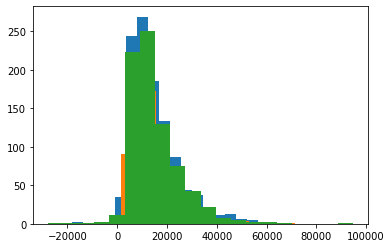

In [90]:
feat_id = 4
#plt.hist(X_imp[:,feat_id],20)
#plt.hist(X_medimp[:,feat_id],20)
#plt.hist(Xt_imp[:,feat_id],20)
X_in_imp = X_imp[:X_in.shape[0],:]
X_out_imp = X_imp[X_in.shape[0]:,:]
#plt.hist(X_in_imp[:,feat_id],20)
#plt.hist(X_out_imp[:,feat_id],20)
plt.hist(X_in[:,feat_id],20)
plt.hist(X_out[:,feat_id],20)
plt.hist(X_out_imp[:,feat_id],20)
plt.show()

In [57]:
np.sum(np.isnan(Xt_imp))

0

In [91]:
### 1. normalise

#X_in = X_imp;
#X_out = Xt_imp;
X_tot = X_imp
#X_tot = np.concatenate((X_in, X_out), axis=0)
scaler = StandardScaler()
X_tot = scaler.fit_transform(X_tot)
X_in = X_tot[:X_in.shape[0],:]
X_out = X_tot[X_in.shape[0]:,:]
print(X_in.shape)
print(X_out.shape)

(1188, 832)
(776, 832)


In [92]:
### 2. feature selection
estimator = GradientBoostingRegressor(loss="ls", n_estimators=500, max_depth=4, subsample=0.7, random_state=666, max_features="auto")
rfe = RFE(estimator, n_features_to_select=300, step=20, verbose=1)
rfe.fit_transform(X_in, y_in)
indx = rfe.get_support(indices=True)
X_in = X_in[:,indx]
X_out = X_out[:,indx]

rfe = RFE(estimator, n_features_to_select=200, step=3, verbose=1)
rfe.fit_transform(X_in, y_in)
indx = rfe.get_support(indices=True)
X_in = X_in[:,indx]
X_out = X_out[:,indx]

rfe = RFE(estimator, n_features_to_select=150, step=1, verbose=1)
rfe.fit_transform(X_in, y_in)
indx = rfe.get_support(indices=True)
X_in = X_in[:,indx]
X_out = X_out[:,indx]



### 3. use different regressors
grad_1 = GradientBoostingRegressor(n_estimators=500, max_depth=4, subsample=0.8, random_state=666, max_features="auto")
grad_2 = GradientBoostingRegressor(n_estimators=500, max_depth=4, subsample=0.8, random_state=667, max_features="auto")
grad_3 = GradientBoostingRegressor(n_estimators=500, max_depth=4, subsample=0.8, random_state=668, max_features="auto")
grad_4 = GradientBoostingRegressor(n_estimators=500, max_depth=4, subsample=0.8, random_state=669, max_features="auto")
grad_5 = GradientBoostingRegressor(n_estimators=500, max_depth=4, subsample=0.8, random_state=670, max_features="auto")

grad_6 = GradientBoostingRegressor(loss="ls", n_estimators=500, max_depth=4, subsample=0.7, random_state=671, max_features="auto")
grad_7 = GradientBoostingRegressor(loss="ls", n_estimators=500, max_depth=4, subsample=0.7, random_state=672, max_features="auto")
grad_8 = GradientBoostingRegressor(loss="ls", n_estimators=500, max_depth=4, subsample=0.7, random_state=673, max_features="auto")
grad_9 = GradientBoostingRegressor(loss="ls", n_estimators=500, max_depth=4, subsample=0.7, random_state=674, max_features="auto")
grad_10 = GradientBoostingRegressor(loss="ls", n_estimators=500, max_depth=4, subsample=0.7, random_state=675, max_features="auto")

grad_11 = GradientBoostingRegressor(loss="huber", n_estimators=500, max_depth=4, subsample=0.7, random_state=676, max_features="auto")
grad_12 = GradientBoostingRegressor(loss="huber", n_estimators=500, max_depth=4, subsample=0.7, random_state=677, max_features="auto")
grad_13 = GradientBoostingRegressor(loss="huber", n_estimators=500, max_depth=4, subsample=0.7, random_state=678, max_features="auto")
grad_14 = GradientBoostingRegressor(loss="huber", n_estimators=500, max_depth=4, subsample=0.7, random_state=679, max_features="auto")
grad_15 = GradientBoostingRegressor(loss="huber", n_estimators=500, max_depth=4, subsample=0.7, random_state=680, max_features="auto")


regs = [grad_1, grad_2, grad_3, grad_4, grad_5, grad_6, grad_7, grad_8, grad_9, grad_10,
        grad_11, grad_12, grad_13, grad_14, grad_15]
fits= np.zeros((X_in.shape[0], len(regs)))
preds = np.zeros((X_out.shape[0], len(regs)))
for i, reg in enumerate(regs):
    reg.fit(X_in, np.ravel(y_in))
    fits[:, i] = reg.predict(X_in)
    preds[:, i] = reg.predict(X_out)


train_pred = np.mean(fits, axis=1)
test_pred = np.mean(preds, axis=1)

print(r2_score(y_in, np.ravel(train_pred))) # training accuracy

test_pred = np.reshape(test_pred, (test_pred.shape[0],1))
labels_out = np.reshape(labels_out, (labels_out.shape[0],1))

out = np.concatenate((labels_out, test_pred), axis=1)
np.savetxt("impoutv2.csv", out, delimiter=",", header="id,y", comments="") # NEED TO MANUALLY REMOVE # FROM HEADER (maybe)

Fitting estimator with 832 features.
Fitting estimator with 812 features.
Fitting estimator with 792 features.
Fitting estimator with 772 features.
Fitting estimator with 752 features.
Fitting estimator with 732 features.
Fitting estimator with 712 features.
Fitting estimator with 692 features.
Fitting estimator with 672 features.
Fitting estimator with 652 features.
Fitting estimator with 632 features.
Fitting estimator with 612 features.
Fitting estimator with 592 features.
Fitting estimator with 572 features.
Fitting estimator with 552 features.
Fitting estimator with 532 features.
Fitting estimator with 512 features.
Fitting estimator with 492 features.
Fitting estimator with 472 features.
Fitting estimator with 452 features.
Fitting estimator with 432 features.
Fitting estimator with 412 features.
Fitting estimator with 392 features.
Fitting estimator with 372 features.
Fitting estimator with 352 features.
Fitting estimator with 332 features.
Fitting estimator with 312 features.
F